In [1]:
# import dependencies
import requests
import json
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

# WHO Data Exploration

In [2]:
# Entry point for WHO's indicators
who_url = 'https://ghoapi.azureedge.net/api/Indicator'

# Initialize variable to loop through indicator list
index = 0

# Read API and print out name of every indicator with its index value
who_data = requests.get(who_url).json()
for indicator in who_data['value']:
    print( index, indicator['IndicatorName'])
    index += 1

0 Ambient air pollution  attributable DALYs per 100'000 children under 5 years
1 Household air pollution attributable deaths
2 Household air pollution attributable deaths in children under 5 years
3 Household air pollution attributable deaths per 100'000 capita
4 Household air pollution  attributable deaths per 100'000 children under 5 years
5 Household air pollution attributable DALYs
6 Household air pollution attributable DALYs in children under 5 years
7 Household air pollution attributable DALYs (per 100 000 population)
8 Household air pollution  attributable DALYs per 100'000 children under 5 years
9 Household air pollution attributable DALYs (per 100 000, age-standardized)
10 Ambient air pollution attributable deaths in children under 5 years
11 Ambient air pollution attributable deaths
12 Ambient air pollution attributable death rate (per 100 000 population, age-standardized)
13 Ambient air pollution attributable DALYs
14 DALYs attributable to ambient air pollution (age-standard

1240 Age-standardized death rates, diabetes mellitus, per 100,000
1241 Age-standardized death rates, drownings, per 100,000
1242 Age-standardized death rates, falls, per 100,000
1243 Age-standardized death rates, fires, per 100,000
1244 Age-standardized death rates, ischaemic heart disease, per 100,000
1245 Age-standardized death rates, liver cancer, per 100,000
1246 Age-standardized death rates, liver cirrhosis, per 100,000
1247 Age-standardized death rates, mouth and oropharynx cancer, per 100,000
1248 Age-standardized death rates, oesophagus cancer, per 100,000
1249 Age-standardized death rates, poisoning, per 100,000
1250 Age-standardized death rates, prematurity and low birth rate, per 100,000
1251 Age-standardized death rates, road traffic accidents, per 100,000
1252 Age-standardized death rates, self-inflicted injury, per 100,000
1253 Age-standardized death rates, other unintentional injuries, per 100,000
1254 Age-standardized death rates, violence, per 100,000
1255 Age-standard

In [3]:
who_data['value'][665]

{'IndicatorCode': 'MH_12',
 'IndicatorName': 'Age-standardized suicide rates (per 100 000 population)',
 'Language': 'EN'}

In [4]:
# Create entry point for suicide rate data
sui_url = 'https://ghoapi.azureedge.net/api/MH_12'

In [5]:
# Read data from API
sui_data = requests.get(sui_url).json()
sui_data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#MH_12',
 'value': [{'Id': 25257369,
   'IndicatorCode': 'MH_12',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'AFG',
   'TimeDimType': 'YEAR',
   'TimeDim': 2001,
   'Dim1Type': 'SEX',
   'Dim1': 'FMLE',
   'Dim2Type': None,
   'Dim2': None,
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '7.9 [4.6-12.6]',
   'NumericValue': 7.89,
   'Low': 4.59,
   'High': 12.5877,
   'Comments': None,
   'Date': '2021-02-09T16:19:56.027+01:00',
   'TimeDimensionValue': '2001',
   'TimeDimensionBegin': '2001-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2001-12-31T00:00:00+01:00'},
  {'Id': 25257370,
   'IndicatorCode': 'MH_12',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'AFG',
   'TimeDimType': 'YEAR',
   'TimeDim': 2000,
   'Dim1Type': 'SEX',
   'Dim1': 'FMLE',
   'Dim2Type': None,
   'Dim2': None,
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   '

In [6]:
len(sui_data['value'])

11641

In [7]:
# Initialize dictionary
sui_dict = {'iso3': [], 'year': [], 'suicide rate': [], 'sex': []}

In [8]:
# Loop through json items to store data
for entry in sui_data['value']:
    sui_dict['iso3'].append(entry['SpatialDim'])
    sui_dict['year'].append(entry['TimeDim'])
    sui_dict['suicide rate'].append(entry['NumericValue'])
    sui_dict['sex'].append(entry['Dim1'])

In [9]:
# Create dataframe
sui_df = pd.DataFrame(sui_dict)
sui_df.head()

,iso3,year,suicide rate,sex
0,AFG,2001,7.89,FMLE
1,AFG,2000,7.77,FMLE
2,AFG,2002,7.95,MLE
3,AFG,2012,6.08,FMLE
4,AFG,2011,6.56,MLE


In [10]:
# Only want both sex values - loc 'sex' == 'BTSX', then drop sex column it's not needed
sui_df = sui_df.loc[sui_df['sex'] == 'BTSX']
sui_df = sui_df.drop(columns = 'sex')

In [11]:
# Number of countries and number of years with data for each country - 194 countries/regions with 20 years of data
sui_df['iso3'].value_counts()

GLOBAL    21
NIC       20
NOR       20
NPL       20
NZL       20
          ..
GRC       20
GRD       20
GTM       20
GUY       20
WPR       20
Name: iso3, Length: 194, dtype: int64

In [12]:
sui_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3881 entries, 11 to 11640
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3          3881 non-null   object 
 1   year          3881 non-null   int64  
 2   suicide rate  3881 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.3+ KB


In [13]:
index_sui = sui_df.set_index('iso3')

In [14]:
# remove entries of unneeded years from the data set
index_sui = index_sui.loc[(index_sui['year'] > 2009)]
index_sui = index_sui.loc[(index_sui['year'] < 2020)]
cleaned_sui_df = index_sui.reset_index()

# check to make sure only the needed entries remain
cleaned_sui_df['year'].value_counts()

2016    195
2019    194
2014    194
2011    194
2013    194
2010    194
2017    194
2018    194
2015    194
2012    194
Name: year, dtype: int64

# IHDI DataFrame

In [15]:
# Designate IHDI data location
ihdi_data_path = '../test/IHDI_time_series.csv'
# Read IHDI data
ihdi_data = pd.read_csv(ihdi_data_path)
ihdi_data

,iso3,country,hdicode,region,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,...,ineq_inc_2010,ineq_inc_2011,ineq_inc_2012,ineq_inc_2013,ineq_inc_2014,ineq_inc_2015,ineq_inc_2016,ineq_inc_2017,ineq_inc_2018,ineq_inc_2019
0,AFG,Afghanistan,Low,SA,0.472,0.477,0.489,0.496,0.500,0.500,...,NaN,NaN,NaN,10.800000,10.800000,10.800000,10.800000,10.800000,NaN,NaN
1,AGO,Angola,Medium,SSA,0.517,0.533,0.544,0.555,0.565,0.572,...,36.400000,50.000000,50.000000,50.000000,28.900000,28.900000,28.900000,28.900000,28.900000,28.900000
2,ALB,Albania,High,ECA,0.745,0.764,0.775,0.782,0.787,0.788,...,14.400000,18.300000,18.300000,18.300000,18.300000,18.300000,18.300000,12.200000,13.200000,13.178980
3,AND,Andorra,Very High,NaN,0.837,0.836,0.858,0.856,0.863,0.862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,0.820,0.826,0.832,0.838,0.847,0.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,Europe and Central Asia,NaN,NaN,0.739,0.748,0.755,0.765,0.772,0.775,...,18.571553,17.728896,18.654602,16.922236,16.584963,16.735295,17.080308,16.725733,16.401101,17.190203
202,NaN,Latin America and the Caribbean,NaN,NaN,0.736,0.741,0.745,0.752,0.756,0.759,...,36.317271,39.265425,38.434441,36.289661,35.247378,34.914246,34.561079,33.258924,34.053272,34.938681
203,NaN,South Asia,NaN,NaN,0.580,0.588,0.597,0.603,0.612,0.620,...,14.526296,15.013335,15.849408,17.890255,17.828920,17.805116,21.306943,17.609085,18.377523,18.464559
204,NaN,Sub-Saharan Africa,NaN,NaN,0.501,0.508,0.515,0.525,0.530,0.535,...,26.041262,28.421803,30.407189,28.194985,27.474611,27.405337,27.043387,27.728122,27.653806,27.620839


In [16]:
# Check number of countries 
ihdi_data['iso3'].value_counts()

AFG    1
QAT    1
MYS    1
NAM    1
NER    1
      ..
GNQ    1
GRC    1
GRD    1
GTM    1
ZWE    1
Name: iso3, Length: 195, dtype: int64

In [17]:
ihdi_data.tail(15)

,iso3,country,hdicode,region,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,...,ineq_inc_2010,ineq_inc_2011,ineq_inc_2012,ineq_inc_2013,ineq_inc_2014,ineq_inc_2015,ineq_inc_2016,ineq_inc_2017,ineq_inc_2018,ineq_inc_2019
191,YEM,Yemen,Low,AS,0.506,0.506,0.504,0.509,0.502,0.483,...,17.600000,17.600000,17.600000,17.600000,20.600000,20.600000,20.600000,21.800000,21.800000,21.800000
192,ZAF,South Africa,High,SSA,0.664,0.665,0.675,0.685,0.693,0.701,...,40.900000,NaN,NaN,NaN,57.300000,56.400000,56.400000,56.400000,57.700000,56.996000
193,ZMB,Zambia,Medium,SSA,0.527,0.534,0.549,0.557,0.561,0.569,...,20.800000,20.800000,42.600000,42.600000,42.600000,48.600000,48.600000,48.600000,48.600000,44.840220
194,ZWE,Zimbabwe,Medium,SSA,0.482,0.499,0.525,0.537,0.547,0.553,...,34.500000,34.500000,35.800000,35.800000,35.800000,35.800000,27.000000,27.000000,27.000000,28.769010
195,NaN,Very high human development,NaN,NaN,0.870,0.874,0.877,0.882,0.885,0.889,...,19.833915,21.067764,19.301829,22.126533,21.765491,19.971380,21.012903,20.366883,19.445313,20.401155
196,NaN,High human development,NaN,NaN,0.705,0.711,0.718,0.725,0.730,0.735,...,28.060905,28.506207,28.361115,28.376503,28.962528,29.588516,29.328523,25.814592,27.515909,28.024197
197,NaN,Medium human development,NaN,NaN,0.571,0.579,0.587,0.593,0.601,0.609,...,16.178684,17.045227,17.996849,18.816762,18.530211,18.449152,21.352960,18.733478,19.661378,19.744047
198,NaN,Low human development,NaN,NaN,0.468,0.475,0.481,0.491,0.497,0.500,...,24.343847,27.214562,29.049161,25.577953,23.381376,23.491510,24.133740,24.528348,24.938316,25.085119
199,NaN,Arab States,NaN,NaN,0.676,0.680,0.687,0.686,0.687,0.691,...,17.769818,17.835611,17.602896,17.331168,17.711421,26.235268,28.512269,26.063087,25.443312,25.361200
200,NaN,East Asia and the Pacific,NaN,NaN,0.688,0.697,0.704,0.711,0.718,0.724,...,27.064922,27.181363,27.179944,27.047140,27.421614,27.380111,26.967756,23.065155,25.570667,26.186272


In [18]:

cleaned_ihdi = ihdi_data.drop(ihdi_data.index[195:])

cleaned_ihdi.tail()

,iso3,country,hdicode,region,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,...,ineq_inc_2010,ineq_inc_2011,ineq_inc_2012,ineq_inc_2013,ineq_inc_2014,ineq_inc_2015,ineq_inc_2016,ineq_inc_2017,ineq_inc_2018,ineq_inc_2019
190,WSM,Samoa,High,EAP,0.698,0.701,0.698,0.700,0.703,0.707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,YEM,Yemen,Low,AS,0.506,0.506,0.504,0.509,0.502,0.483,...,17.6,17.6,17.6,17.6,20.6,20.6,20.6,21.8,21.8,21.80000
192,ZAF,South Africa,High,SSA,0.664,0.665,0.675,0.685,0.693,0.701,...,40.9,NaN,NaN,NaN,57.3,56.4,56.4,56.4,57.7,56.99600
193,ZMB,Zambia,Medium,SSA,0.527,0.534,0.549,0.557,0.561,0.569,...,20.8,20.8,42.6,42.6,42.6,48.6,48.6,48.6,48.6,44.84022
194,ZWE,Zimbabwe,Medium,SSA,0.482,0.499,0.525,0.537,0.547,0.553,...,34.5,34.5,35.8,35.8,35.8,35.8,27.0,27.0,27.0,28.76901


In [19]:
# create new dataframe with just hdi / ihdi entries
# create dictionary with iso3 code, country, and hdi/ihdi values
ihdi_dic = {'iso3': [], 'country': [], "hdi_2010" : [], "hdi_2011" : [], "hdi_2012" : [], "hdi_2013" : [], "hdi_2014" : [], "hdi_2015" : [], "hdi_2016" : [], "hdi_2017" : [], "hdi_2018" : [], "hdi_2019" : [], "ihdi_2010" : [], "ihdi_2011" : [], "ihdi_2012" : [], "ihdi_2013" : [], "ihdi_2014" : [], "ihdi_2015" : [], "ihdi_2016" : [], "ihdi_2017" : [], "ihdi_2018" : [], "ihdi_2019" : []}
for entry in range(len(cleaned_ihdi)):
    ihdi_dic['iso3'].append(cleaned_ihdi.loc[entry, 'iso3'])
    ihdi_dic['country'].append(cleaned_ihdi.loc[entry, 'country'])
    ihdi_dic['hdi_2010'].append(cleaned_ihdi.loc[entry, 'hdi_2010'])
    ihdi_dic['hdi_2011'].append(cleaned_ihdi.loc[entry, 'hdi_2011'])
    ihdi_dic['hdi_2012'].append(cleaned_ihdi.loc[entry, 'hdi_2012'])
    ihdi_dic['hdi_2013'].append(cleaned_ihdi.loc[entry, 'hdi_2013'])
    ihdi_dic['hdi_2014'].append(cleaned_ihdi.loc[entry, 'hdi_2014'])
    ihdi_dic['hdi_2015'].append(cleaned_ihdi.loc[entry, 'hdi_2015'])
    ihdi_dic['hdi_2016'].append(cleaned_ihdi.loc[entry, 'hdi_2016'])
    ihdi_dic['hdi_2017'].append(cleaned_ihdi.loc[entry, 'hdi_2017'])
    ihdi_dic['hdi_2018'].append(cleaned_ihdi.loc[entry, 'hdi_2018'])
    ihdi_dic['hdi_2019'].append(cleaned_ihdi.loc[entry, 'hdi_2019'])
    ihdi_dic['ihdi_2010'].append(cleaned_ihdi.loc[entry, 'ihdi_2010'])
    ihdi_dic['ihdi_2011'].append(cleaned_ihdi.loc[entry, 'ihdi_2011'])
    ihdi_dic['ihdi_2012'].append(cleaned_ihdi.loc[entry, 'ihdi_2012'])
    ihdi_dic['ihdi_2013'].append(cleaned_ihdi.loc[entry, 'ihdi_2013'])
    ihdi_dic['ihdi_2014'].append(cleaned_ihdi.loc[entry, 'ihdi_2014'])
    ihdi_dic['ihdi_2015'].append(cleaned_ihdi.loc[entry, 'ihdi_2015'])
    ihdi_dic['ihdi_2016'].append(cleaned_ihdi.loc[entry, 'ihdi_2016'])
    ihdi_dic['ihdi_2017'].append(cleaned_ihdi.loc[entry, 'ihdi_2017'])
    ihdi_dic['ihdi_2018'].append(cleaned_ihdi.loc[entry, 'ihdi_2018'])
    ihdi_dic['ihdi_2019'].append(cleaned_ihdi.loc[entry, 'ihdi_2019'])
cleaned_ihdiv2 = pd.DataFrame(ihdi_dic)  

In [20]:
cleaned_ihdiv2

,iso3,country,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,...,ihdi_2010,ihdi_2011,ihdi_2012,ihdi_2013,ihdi_2014,ihdi_2015,ihdi_2016,ihdi_2017,ihdi_2018,ihdi_2019
0,AFG,Afghanistan,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,...,NaN,NaN,NaN,0.340,0.343,0.341,0.353,0.356,NaN,NaN
1,AGO,Angola,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,...,0.311,NaN,0.305,0.311,0.356,0.361,0.391,0.394,0.397,0.397
2,ALB,Albania,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,...,0.650,0.658,0.668,0.677,0.681,0.682,0.691,0.711,0.705,0.708
3,AND,Andorra,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,0.698,0.701,0.698,0.700,0.703,0.707,0.710,0.710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,YEM,Yemen,0.506,0.506,0.504,0.509,0.502,0.483,0.474,0.467,...,0.333,0.342,0.341,0.342,0.331,0.320,0.325,0.318,0.319,0.321
192,ZAF,South Africa,0.664,0.665,0.675,0.685,0.693,0.701,0.703,0.705,...,0.457,NaN,NaN,NaN,0.446,0.458,0.469,0.471,0.464,0.468
193,ZMB,Zambia,0.527,0.534,0.549,0.557,0.561,0.569,0.571,0.578,...,0.361,0.377,0.348,0.362,0.368,0.366,0.377,0.381,0.387,0.401


In [21]:
# separate year from hdi
hdi = cleaned_ihdiv2.melt(id_vars = ['iso3', 'country'], value_vars = ['hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013',
       'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019'], var_name = 'year', value_name = 'hdi')

In [22]:
hdi['year'] = hdi['year'].str.split('_',expand=True)[1]
hdi.head()

,iso3,country,year,hdi
0,AFG,Afghanistan,2010,0.472
1,AGO,Angola,2010,0.517
2,ALB,Albania,2010,0.745
3,AND,Andorra,2010,0.837
4,ARE,United Arab Emirates,2010,0.820


In [23]:
# separate year from ihdi
ihdi = cleaned_ihdiv2.melt(id_vars = ['iso3', 'country'], value_vars = ['ihdi_2010', 'ihdi_2011', 'ihdi_2012', 'ihdi_2013',
       'ihdi_2014', 'ihdi_2015', 'ihdi_2016', 'ihdi_2017', 'ihdi_2018', 'ihdi_2019'], var_name = 'year', value_name = 'ihdi')
ihdi.head()

,iso3,country,year,ihdi
0,AFG,Afghanistan,ihdi_2010,NaN
1,AGO,Angola,ihdi_2010,0.311
2,ALB,Albania,ihdi_2010,0.650
3,AND,Andorra,ihdi_2010,NaN
4,ARE,United Arab Emirates,ihdi_2010,NaN


In [24]:
ihdi['year'] = ihdi['year'].str.split('_', expand=True)[1]
ihdi.head()

,iso3,country,year,ihdi
0,AFG,Afghanistan,2010,NaN
1,AGO,Angola,2010,0.311
2,ALB,Albania,2010,0.650
3,AND,Andorra,2010,NaN
4,ARE,United Arab Emirates,2010,NaN


In [25]:
# merge dataframes with separated hdi/ihdi and year entries
final_ihdi_df = pd.merge(ihdi, hdi, on=['iso3','country','year'], how = 'inner')

In [26]:
final_ihdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1949
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iso3     1950 non-null   object 
 1   country  1950 non-null   object 
 2   year     1950 non-null   object 
 3   ihdi     1454 non-null   float64
 4   hdi      1883 non-null   float64
dtypes: float64(2), object(3)
memory usage: 91.4+ KB


In [27]:
# set 'year' type to int64 (for merging with cleaned_sui_df)
final_ihdi_df = final_ihdi_df.astype({'year': 'int64'})

# Merge DataFrames

In [28]:
# merge cleaned_sui_df with final_ihdi_df on year and iso3 code
sui_vs_ihdi = pd.merge(cleaned_sui_df, final_ihdi_df, on=['year','iso3'], how='inner')
sui_vs_ihdi

,iso3,year,suicide rate,country,ihdi,hdi
0,AFG,2019,5.9600,Afghanistan,NaN,0.511
1,AFG,2014,6.0200,Afghanistan,0.343,0.500
2,AFG,2011,6.4200,Afghanistan,NaN,0.477
3,AFG,2013,6.1700,Afghanistan,0.340,0.496
4,AFG,2010,6.6700,Afghanistan,NaN,0.472
...,...,...,...,...,...,...
1825,ZWE,2017,25.8514,Zimbabwe,0.430,0.563
1826,ZWE,2012,33.0652,Zimbabwe,0.376,0.525
1827,ZWE,2010,35.0142,Zimbabwe,0.338,0.482
1828,ZWE,2014,30.8330,Zimbabwe,0.399,0.547


In [29]:
# finding how many non-null entries
sui_vs_ihdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3          1830 non-null   object 
 1   year          1830 non-null   int64  
 2   suicide rate  1830 non-null   float64
 3   country       1830 non-null   object 
 4   ihdi          1444 non-null   float64
 5   hdi           1810 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 100.1+ KB


In [30]:
# dropping null entries
sui_vs_ihdi.dropna(inplace=True)

In [31]:
# checking how many entries for each year
sui_vs_ihdi['year'].value_counts()

2014    150
2015    150
2019    150
2017    149
2016    148
2018    148
2013    144
2010    139
2011    134
2012    132
Name: year, dtype: int64

# Visualize and Analyze HDI vs. Suicide Rates

(0.0, 116.1953)

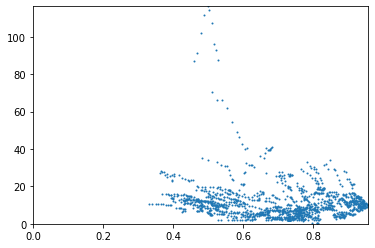

In [32]:
# create scatter plot of hdi vs suicide rate
plt.scatter(sui_vs_ihdi['hdi'], sui_vs_ihdi['suicide rate'], s=1)
plt.xlim(0, max(sui_vs_ihdi['hdi']))
plt.ylim(0, max(sui_vs_ihdi['suicide rate']))

In [34]:
m, b, r, p, e = st.linregress(sui_vs_ihdi['hdi'], sui_vs_ihdi['suicide rate'])

In [35]:
m, b

(-11.103927245395145, 19.429619172404834)

2.217886728353814e-08
-0.14654425122750073


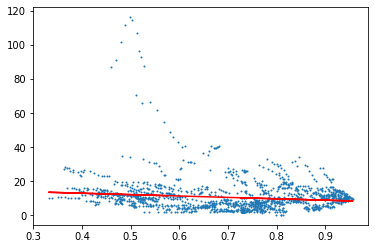

In [53]:
sui_hdi_regress = m * sui_vs_ihdi['hdi'] + b

plt.scatter(sui_vs_ihdi['hdi'], sui_vs_ihdi['suicide rate'], s=1)
plt.plot(sui_vs_ihdi['hdi'], sui_hdi_regress, c='red')
print(p)
print(r)

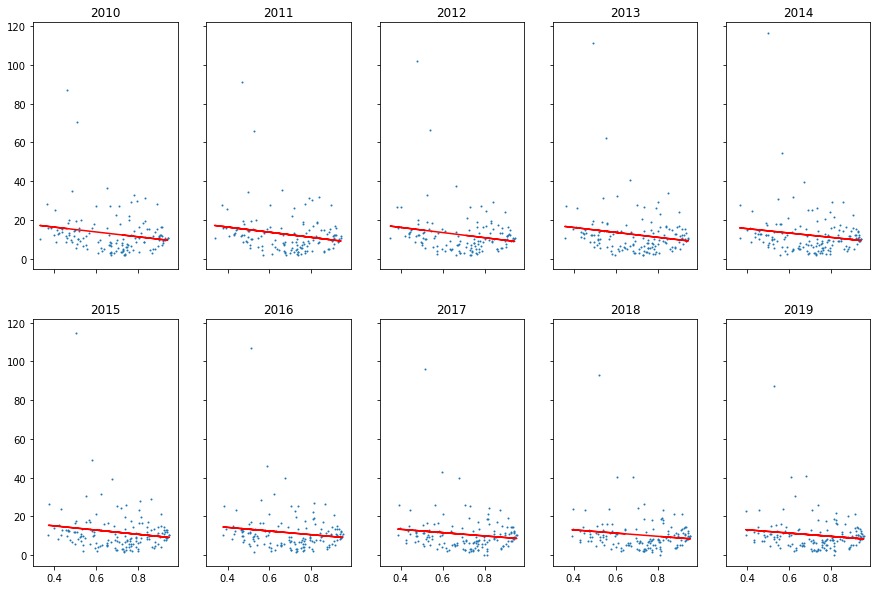

In [37]:
figure, axeses = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharex=True, sharey=True)
sui_vs_ihdi.sort_values('year', inplace=True)
for axes, year in zip(axeses.flat, sui_vs_ihdi['year'].unique()):
    sui_vs_hdi_by_year = sui_vs_ihdi.loc[sui_vs_ihdi['year'] == year]
    m, b, r, p, e = st.linregress(sui_vs_hdi_by_year['hdi'], sui_vs_hdi_by_year['suicide rate'])
    best_fit = m*sui_vs_hdi_by_year['hdi'] + b
    best_fit_eq = f'y={round(m,1)}*x+{round(b)}'
    axes.plot(sui_vs_hdi_by_year['hdi'], best_fit, c='red')
    axes.annotate(best_fit_eq, (10, 50), c='red')
    axes.set_title(year)
    axes.scatter(sui_vs_hdi_by_year['hdi'], sui_vs_hdi_by_year['suicide rate'],  s=1)

# Visualize and Analyze IHDI vs. Suicide Rates

(0.0, 116.1953)

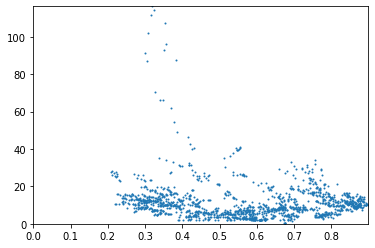

In [38]:
plt.scatter(sui_vs_ihdi['ihdi'], sui_vs_ihdi['suicide rate'], s=1)
plt.xlim(0, max(sui_vs_ihdi['ihdi']))
plt.ylim(0, max(sui_vs_ihdi['suicide rate']))

In [47]:
m, b, r, p, e = st.linregress(sui_vs_ihdi['ihdi'], sui_vs_ihdi['suicide rate'])

In [48]:
m, b

(-8.153607954879352, 16.283465589167438)

2.217886728353814e-08
-0.14654425122750073


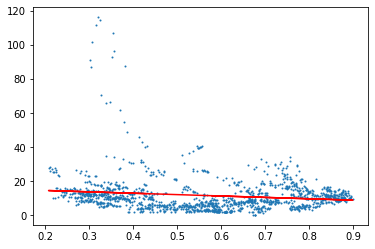

In [52]:
sui_ihdi_regress = m * sui_vs_ihdi['ihdi'] + b

plt.scatter(sui_vs_ihdi['ihdi'], sui_vs_ihdi['suicide rate'], s=1)
plt.plot(sui_vs_ihdi['ihdi'], sui_ihdi_regress, c='red')
print(p)
print(r)

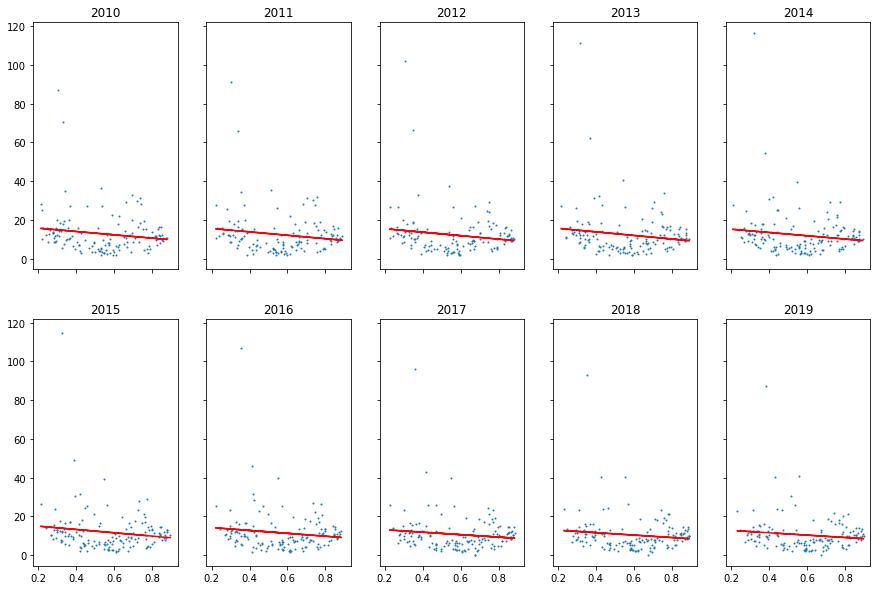

In [44]:
figure, axeses = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharex=True, sharey=True)
sui_vs_ihdi.sort_values('year', inplace=True)
for axes, year in zip(axeses.flat, sui_vs_ihdi['year'].unique()):
    sui_vs_ihdi_by_year = sui_vs_ihdi.loc[sui_vs_ihdi['year'] == year]
    m, b, r, p, e = st.linregress(sui_vs_ihdi_by_year['ihdi'], sui_vs_ihdi_by_year['suicide rate'])
    best_fit = m*sui_vs_ihdi_by_year['ihdi'] + b
    best_fit_eq = f'y={round(m,1)}*x+{round(b)}'
    axes.plot(sui_vs_ihdi_by_year['ihdi'], best_fit, c='red')
    axes.annotate(best_fit_eq, (10, 50), c='red')
    axes.set_title(year)
    axes.scatter(sui_vs_ihdi_by_year['ihdi'], sui_vs_ihdi_by_year['suicide rate'],  s=1)